In [312]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [313]:
# Loading the training data, test data and sample submission file
train_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
Submission1 = pd.read_csv('sample_submission.csv')

In [314]:
# Analysing the training data
train_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [315]:
# Missing values in training data
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [316]:
# For some feature there are no missing values actually, NA for those features is a lable for not available
# To deal with this we will encode those NA values as nothing1, nothing2, nothing3 and so on....

train_data['Alley'].fillna('Nothing1', inplace = True)
train_data['BsmtQual'].fillna('Nothing2', inplace = True)
train_data['BsmtCond'].fillna('Nothing3', inplace = True)
train_data['BsmtExposure'].fillna('Nothing4', inplace = True)
train_data['BsmtFinType1'].fillna('Nothing5', inplace = True)
train_data['BsmtFinType2'].fillna('Nothing6', inplace = True)
train_data['FireplaceQu'].fillna('Nothing7', inplace = True)
train_data['GarageType'].fillna('Nothing8', inplace = True)
train_data['GarageFinish'].fillna('Nothing9', inplace = True)
train_data['GarageQual'].fillna('Nothing10', inplace = True)
train_data['GarageCond'].fillna('Nothing11', inplace = True)
train_data['PoolQC'].fillna('Nothing12', inplace = True)
train_data['Fence'].fillna('Nothing13', inplace = True)
train_data['MiscFeature'].fillna('Nothing14', inplace = True)

# Now to deal with the missing values in GarageYrBlt, MasVnrArea and LotFrontage we will use median
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace = True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace = True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(), inplace = True)

# And lastly to deal with the missing values in Electrical and MasVnrType we will fill the missing value with most frequent values
train_data['Electrical'].fillna(train_data['Electrical'].value_counts(). idxmax(), inplace = True)
train_data['MasVnrType'].fillna(train_data['MasVnrType'].value_counts(). idxmax(), inplace = True)

In [317]:
# Now total missing values are
train_data.isnull().sum().sum()    # 0 missing values in training data

0

In [318]:
# Extracting the variable to be predicted from training data

train_y = train_data['SalePrice']

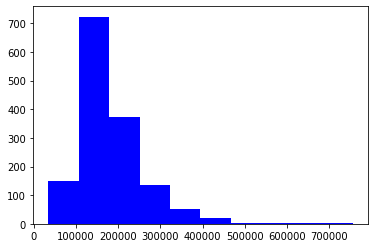

In [319]:
# Analyzing the distribution of feature to be predicted
plt.hist(train_y, color='blue')
plt.show()       # As we can see it is not a normal distribution so we will convert it into normal distribution by lograthimic transformation

# We will do so because we will use regression here

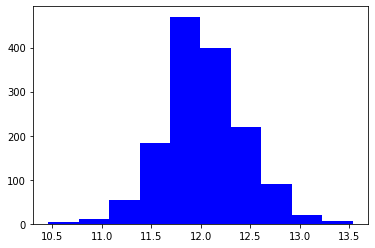

In [320]:
# logarithmic transformation and plotting
train_y = np.log(train_y)

plt.hist(train_y, color = 'blue')
plt.show()            # Now its a normal distribution

In [321]:
# Feature engineering to encode different categorical feature into number by using one hot vector

dummies1 = pd.get_dummies(train_data['MSSubClass'], prefix = 'MSSubClass' )
dummies2 = pd.get_dummies(train_data['MSZoning'], prefix = 'MSZoning' )
dummies3 = pd.get_dummies(train_data['Street'], prefix = 'Street')
dummies4 = pd.get_dummies(train_data['Alley'], prefix = 'Alley')
dummies5 = pd.get_dummies(train_data['LotShape'], prefix = 'LotShape')
dummies6 = pd.get_dummies(train_data['LandContour'], prefix = 'LandContour')
dummies7 = pd.get_dummies(train_data['Utilities'], prefix = 'Utilities')
dummies8 = pd.get_dummies(train_data['LotConfig'], prefix = 'LotConfig')
dummies9 = pd.get_dummies(train_data['LandSlope'], prefix = 'LandSlope')
dummies10 = pd.get_dummies(train_data['Neighborhood'], prefix = 'Neighborhood')
dummies11 = pd.get_dummies(train_data['Condition1'], prefix = 'Condition1')
dummies12 = pd.get_dummies(train_data['Condition2'], prefix = 'Condition2')
dummies13 = pd.get_dummies(train_data['BldgType'], prefix = 'BldgType')
dummies14 = pd.get_dummies(train_data['HouseStyle'], prefix = 'HouseStyle')
dummies15 = pd.get_dummies(train_data['OverallQual'], prefix = 'OverallQual')
dummies16 = pd.get_dummies(train_data['OverallCond'], prefix = 'OverallCond')
dummies17 = pd.get_dummies(train_data['RoofStyle'], prefix = 'RoofStyle')
dummies18 = pd.get_dummies(train_data['RoofMatl'], prefix = 'RoofMatl')
dummies19 = pd.get_dummies(train_data['Exterior1st'], prefix = 'Exterior1st')
dummies20 = pd.get_dummies(train_data['Exterior2nd'], prefix = 'Exterior2nd')
dummies21 = pd.get_dummies(train_data['MasVnrType'], prefix = 'MasVnrType')
dummies22 = pd.get_dummies(train_data['ExterQual'], prefix = 'ExterQual')
dummies23 = pd.get_dummies(train_data['ExterCond'], prefix = 'ExterCond')
dummies24 = pd.get_dummies(train_data['Foundation'], prefix = 'Foundation')
dummies25 = pd.get_dummies(train_data['BsmtQual'], prefix = 'BsmtQual')
dummies26 = pd.get_dummies(train_data['BsmtCond'], prefix = 'BsmtCond')
dummies28 = pd.get_dummies(train_data['BsmtExposure'], prefix = 'BsmtExposure')
dummies29 = pd.get_dummies(train_data['BsmtFinType1'], prefix = 'BsmtFinType1')
dummies30 = pd.get_dummies(train_data['BsmtFinType2'], prefix = 'BsmtFinType2')
dummies31 = pd.get_dummies(train_data['Heating'], prefix = 'Heating')
dummies32 = pd.get_dummies(train_data['HeatingQC'], prefix = 'HeatingQC')
dummies33 = pd.get_dummies(train_data['CentralAir'], prefix = 'CentralAir')
dummies34 = pd.get_dummies(train_data['Electrical'], prefix = 'Electrical')
dummies35 = pd.get_dummies(train_data['KitchenQual'], prefix = 'KitchenQual')
dummies36 = pd.get_dummies(train_data['Functional'], prefix = 'Functional')
dummies37 = pd.get_dummies(train_data['FireplaceQu'], prefix = 'FireplaceQu')
dummies38 = pd.get_dummies(train_data['GarageType'], prefix = 'GarageType')
dummies39 = pd.get_dummies(train_data['GarageFinish'], prefix = 'GarageFinish')
dummies40 = pd.get_dummies(train_data['GarageQual'], prefix = 'GarageQual')
dummies41 = pd.get_dummies(train_data['GarageCond'], prefix = 'GarageCond')
dummies42 = pd.get_dummies(train_data['PavedDrive'], prefix = 'PavedDrive')
dummies43 = pd.get_dummies(train_data['PoolQC'], prefix = 'PoolQC')
dummies44 = pd.get_dummies(train_data['Fence'], prefix = 'Fence')
dummies45 = pd.get_dummies(train_data['MiscFeature'], prefix = 'MiscFeature')
dummies46 = pd.get_dummies(train_data['SaleType'], prefix = 'SaleType')
dummies47 = pd.get_dummies(train_data['SaleCondition'], prefix = 'SaleCondition')

train_x = pd.concat([train_data, dummies1, dummies2, dummies3, dummies4, dummies5, dummies6, dummies7, dummies8, dummies9, dummies10, dummies11, dummies12, dummies13, dummies14, dummies15, dummies16, dummies17, dummies18, dummies19, dummies20, dummies21, dummies22, dummies23, dummies24, dummies25, dummies26, dummies28, dummies29, dummies30, dummies31, dummies32, dummies33, dummies34, dummies35, dummies36, dummies37, dummies38, dummies39, dummies40, dummies41, dummies42, dummies43, dummies44, dummies45, dummies46, dummies47], axis = 1)

train_x = train_x.drop(columns = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','SalePrice','Id','Utilities_NoSeWa','Condition2_RRAe','Condition2_RRAn', 'Condition2_RRNn','Exterior2nd_Other','RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll','Exterior1st_ImStucc','Exterior1st_Stone','Electrical_Mix','Heating_Floor','Heating_OthW','GarageQual_Ex','PoolQC_Fa' ,'MiscFeature_TenC','HouseStyle_2.5Fin'])

In [322]:
# Same as we have done in case of training data, we will do in case of test data
# Analyzing test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [323]:
# Missing value in test data
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [324]:
# For some feature there are no missing values actually, NA for those features is a lable for not available
# To deal with this we will encode those NA values as nothing1, nothing2, nothing3 and so on....

test['Alley'].fillna('Nothing1', inplace = True)
test['BsmtQual'].fillna('Nothing2', inplace = True)
test['BsmtCond'].fillna('Nothing3', inplace = True)
test['BsmtExposure'].fillna('Nothing4', inplace = True)
test['BsmtFinType1'].fillna('Nothing5', inplace = True)
test['BsmtFinType2'].fillna('Nothing6', inplace = True)
test['FireplaceQu'].fillna('Nothing7', inplace = True)
test['GarageType'].fillna('Nothing8', inplace = True)
test['GarageFinish'].fillna('Nothing9', inplace = True)
test['GarageQual'].fillna('Nothing10', inplace = True)
test['GarageCond'].fillna('Nothing11', inplace = True)
test['PoolQC'].fillna('Nothing12', inplace = True)
test['Fence'].fillna('Nothing13', inplace = True)
test['MiscFeature'].fillna('Nothing14', inplace = True)

# Now to deal with the missing values for integer or float based features we will use median
test['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace = True)
test['GarageCars'].fillna(train_data['GarageCars'].median(), inplace = True)
test['GarageArea'].fillna(train_data['GarageArea'].median(), inplace = True)
test['MasVnrArea'].fillna(train_data['MasVnrArea'].median(), inplace = True)
test['BsmtFinSF1'].fillna(train_data['BsmtFinSF1'].median(), inplace = True)
test['BsmtFinSF2'].fillna(train_data['BsmtFinSF2'].median(), inplace = True)
test['BsmtUnfSF'].fillna(train_data['BsmtUnfSF'].median(), inplace = True)
test['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].median(), inplace = True)
test['BsmtFullBath'].fillna(train_data['BsmtFullBath'].median(), inplace = True)
test['BsmtHalfBath'].fillna(train_data['BsmtHalfBath'].median(), inplace = True)
test['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace = True)

# As we can see it has more missing value for some more categorical features so we will replace those missing value with most frequent values
test['MSZoning'].fillna(train_data['MSZoning'].value_counts(). idxmax(), inplace = True)
test['SaleType'].fillna(train_data['SaleType'].value_counts(). idxmax(), inplace = True)
test['Functional'].fillna(train_data['Functional'].value_counts(). idxmax(), inplace = True)
test['KitchenQual'].fillna(train_data['KitchenQual'].value_counts(). idxmax(), inplace = True)
test['Utilities'].fillna(test['Utilities'].value_counts(). idxmax(), inplace = True)
test['Exterior1st'].fillna(test['Exterior1st'].value_counts(). idxmax(), inplace = True)
test['Exterior2nd'].fillna(test['Exterior2nd'].value_counts(). idxmax(), inplace = True)
test['MasVnrType'].fillna(train_data['MasVnrType'].value_counts(). idxmax(), inplace = True)

In [325]:
# Now total missing values are
test.isnull().sum().sum()  # No missing values

0

In [326]:
# Feature engineering to encode different categorical feature into number by using one hot vector
dummies1 = pd.get_dummies(test['MSSubClass'], prefix = 'MSSubClass' )
dummies2 = pd.get_dummies(test['MSZoning'], prefix = 'MSZoning' )
dummies3 = pd.get_dummies(test['Street'], prefix = 'Street')
dummies4 = pd.get_dummies(test['Alley'], prefix = 'Alley')
dummies5 = pd.get_dummies(test['LotShape'], prefix = 'LotShape')
dummies6 = pd.get_dummies(test['LandContour'], prefix = 'LandContour')
dummies7 = pd.get_dummies(test['Utilities'], prefix = 'Utilities')
dummies8 = pd.get_dummies(test['LotConfig'], prefix = 'LotConfig')
dummies9 = pd.get_dummies(test['LandSlope'], prefix = 'LandSlope')
dummies10 = pd.get_dummies(test['Neighborhood'], prefix = 'Neighborhood')
dummies11 = pd.get_dummies(test['Condition1'], prefix = 'Condition1')
dummies12 = pd.get_dummies(test['Condition2'], prefix = 'Condition2')
dummies13 = pd.get_dummies(test['BldgType'], prefix = 'BldgType')
dummies14 = pd.get_dummies(test['HouseStyle'], prefix = 'HouseStyle')
dummies15 = pd.get_dummies(test['OverallQual'], prefix = 'OverallQual')
dummies16 = pd.get_dummies(test['OverallCond'], prefix = 'OverallCond')
dummies17 = pd.get_dummies(test['RoofStyle'], prefix = 'RoofStyle')
dummies18 = pd.get_dummies(test['RoofMatl'], prefix = 'RoofMatl')
dummies19 = pd.get_dummies(test['Exterior1st'], prefix = 'Exterior1st')
dummies20 = pd.get_dummies(test['Exterior2nd'], prefix = 'Exterior2nd')
dummies21 = pd.get_dummies(test['MasVnrType'], prefix = 'MasVnrType')
dummies22 = pd.get_dummies(test['ExterQual'], prefix = 'ExterQual')
dummies23 = pd.get_dummies(test['ExterCond'], prefix = 'ExterCond')
dummies24 = pd.get_dummies(test['Foundation'], prefix = 'Foundation')
dummies25 = pd.get_dummies(test['BsmtQual'], prefix = 'BsmtQual')
dummies26 = pd.get_dummies(test['BsmtCond'], prefix = 'BsmtCond')
dummies28 = pd.get_dummies(test['BsmtExposure'], prefix = 'BsmtExposure')
dummies29 = pd.get_dummies(test['BsmtFinType1'], prefix = 'BsmtFinType1')
dummies30 = pd.get_dummies(test['BsmtFinType2'], prefix = 'BsmtFinType2')
dummies31 = pd.get_dummies(test['Heating'], prefix = 'Heating')
dummies32 = pd.get_dummies(test['HeatingQC'], prefix = 'HeatingQC')
dummies33 = pd.get_dummies(test['CentralAir'], prefix = 'CentralAir')
dummies34 = pd.get_dummies(test['Electrical'], prefix = 'Electrical')
dummies35 = pd.get_dummies(test['KitchenQual'], prefix = 'KitchenQual')
dummies36 = pd.get_dummies(test['Functional'], prefix = 'Functional')
dummies37 = pd.get_dummies(test['FireplaceQu'], prefix = 'FireplaceQu')
dummies38 = pd.get_dummies(test['GarageType'], prefix = 'GarageType')
dummies39 = pd.get_dummies(test['GarageFinish'], prefix = 'GarageFinish')
dummies40 = pd.get_dummies(test['GarageQual'], prefix = 'GarageQual')
dummies41 = pd.get_dummies(test['GarageCond'], prefix = 'GarageCond')
dummies42 = pd.get_dummies(test['PavedDrive'], prefix = 'PavedDrive')
dummies43 = pd.get_dummies(test['PoolQC'], prefix = 'PoolQC')
dummies44 = pd.get_dummies(test['Fence'], prefix = 'Fence')
dummies45 = pd.get_dummies(test['MiscFeature'], prefix = 'MiscFeature')
dummies46 = pd.get_dummies(test['SaleType'], prefix = 'SaleType')
dummies47 = pd.get_dummies(test['SaleCondition'], prefix = 'SaleCondition')

test = pd.concat([test, dummies1, dummies2, dummies3, dummies4, dummies5, dummies6, dummies7, dummies8, dummies9, dummies10, dummies11, dummies12, dummies13, dummies14, dummies15, dummies16, dummies17, dummies18, dummies19, dummies20, dummies21, dummies22, dummies23, dummies24, dummies25, dummies26, dummies28, dummies29, dummies30, dummies31, dummies32, dummies33, dummies34, dummies35, dummies36, dummies37, dummies38, dummies39, dummies40, dummies41, dummies42, dummies43, dummies44, dummies45, dummies46, dummies47], axis = 1)

test = test.drop(columns = ['Id','MSSubClass_150', 'MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'])

In [327]:
# Implementation of RandomForestRegression to build the model
# Importing required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

#Training the model and RMSLE calculaton
model = RandomForestRegressor()
model.fit(train_x, train_y)
predict = model.predict(train_x)
acc = mean_squared_log_error(train_y, predict)**(0.5)
print(acc)

0.0041319458307311615


In [328]:
# Prediction on test data
submission2 = model.predict(test)
submission2 = np.exp(submission2)

In [329]:
# Making the final csv file and showing it
submission = pd.concat([Submission1,pd.DataFrame(submission2)], axis = 1)
submission

,Id,0
0,1461,125200.118840
1,1462,153561.466063
2,1463,183419.923153
3,1464,183688.716978
4,1465,193505.187581
5,1466,181087.486026
6,1467,172630.301235
7,1468,174761.206598
8,1469,183536.792708
9,1470,117916.722390


In [330]:
# Renamming the result column as SalePrice and saving it
submission = submission.rename(columns = {0 : 'SalePrice'})
submission.to_csv('Submission.csv')